<a href="https://colab.research.google.com/github/Nikita0190/AIML-Project-Series/blob/main/PROJECT3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

# Load the data
data = pd.read_csv('Health.csv')

# Separate features and target
X = data.drop('disease', axis=1)
y = data['disease']

# Identify numeric and categorical columns
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Create preprocessing pipelines for both numeric and categorical data
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Fit and transform the data
X_preprocessed = preprocessor.fit_transform(X)

# Get feature names after preprocessing
onehot_encoder = preprocessor.named_transformers_['cat'].named_steps['onehot']
cat_feature_names = onehot_encoder.get_feature_names_out(categorical_features)
feature_names = list(numeric_features) + list(cat_feature_names)

# Convert to DataFrame
if isinstance(X_preprocessed, np.ndarray):
    X_preprocessed_df = pd.DataFrame(X_preprocessed, columns=feature_names)
else:
    X_preprocessed_df = pd.DataFrame(X_preprocessed.toarray(), columns=feature_names)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed_df, y, test_size=0.2, random_state=42)

print("Preprocessed data shape:", X_preprocessed_df.shape)
print("\nFirst few rows of preprocessed data:")
print(X_preprocessed_df.head())

# Feature Selection
from sklearn.feature_selection import SelectKBest, f_classif

# Select the top k features
k = 15  # You may want to adjust this value based on your needs
selector = SelectKBest(score_func=f_classif, k=k)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Get the names of the selected features
selected_features = X_train.columns[selector.get_support()].tolist()
print("\nSelected features:", selected_features)

# Update X_train and X_test to include only selected features
X_train_selected = pd.DataFrame(X_train_selected, columns=selected_features)
X_test_selected = pd.DataFrame(X_test_selected, columns=selected_features)

print("\nShape of X_train_selected:", X_train_selected.shape)
print("Shape of X_test_selected:", X_test_selected.shape)


Preprocessed data shape: (1000, 22)

First few rows of preprocessed data:
        age       bmi  blood_pressure_systolic  blood_pressure_diastolic  \
0  0.769461  0.348429                -0.617664                 -1.570774   
1 -0.996781  0.301254                 0.561985                 -1.398022   
2  1.724186  0.591939                -0.539021                  1.020502   
3  1.199087 -1.390156                 0.837236                 -1.282854   
4 -0.710363  0.555264                 0.837236                  0.271911   

   cholesterol   glucose  gender_Female  gender_Male  smoking_No  smoking_Yes  \
0     0.962357 -0.665023            0.0          1.0         0.0          1.0   
1    -1.436586 -0.371131            0.0          1.0         1.0          0.0   
2     1.133710  0.189934            1.0          0.0         0.0          1.0   
3    -0.655978 -0.745175            0.0          1.0         0.0          1.0   
4    -0.389428  1.472369            0.0          1.0         1.0

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif
import pandas as pd

# Assuming you already have your X_train and y_train defined
# X_train = pd.DataFrame(...)  # Your training feature set
# y_train = [...]              # Your target variable

# Select the top k features
k = 10  # You can adjust this value
selector = SelectKBest(score_func=f_classif, k=k)
X_train_selected = selector.fit_transform(X_train, y_train)

# Transform your test set
X_test_selected = selector.transform(X_test)

# Get the names of the selected features using X_train
selected_features = X_train.columns[selector.get_support()].tolist()
print("Selected features:", selected_features)


Selected features: ['age', 'bmi', 'blood_pressure_systolic', 'cholesterol', 'glucose', 'gender_Female', 'gender_Male', 'family_history_No', 'previous_stroke_No', 'previous_stroke_Yes']


In [ ]:
print("Shape of X_train:", X_train.shape)
print("Columns of X_train:", X_train.columns.tolist())


Shape of X_train: (800, 22)
Columns of X_train: ['age', 'bmi', 'blood_pressure_systolic', 'blood_pressure_diastolic', 'cholesterol', 'glucose', 'gender_Female', 'gender_Male', 'smoking_No', 'smoking_Yes', 'alcohol_consumption_Heavy', 'alcohol_consumption_Light', 'alcohol_consumption_Moderate', 'physical_activity_High', 'physical_activity_Low', 'physical_activity_Moderate', 'family_history_No', 'family_history_Yes', 'previous_heart_problems_No', 'previous_heart_problems_Yes', 'previous_stroke_No', 'previous_stroke_Yes']


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC()
}

# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train_selected, y_train)
    y_pred = model.predict(X_test_selected)

    results[name] = {
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred, average='weighted'),
        'recall': recall_score(y_test, y_pred, average='weighted'),
        'f1': f1_score(y_test, y_pred, average='weighted')
    }

# Print results
for name, metrics in results.items():
    print(f"\n{name}:")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}")


Logistic Regression:
accuracy: 0.7600
precision: 0.7476
recall: 0.7600
f1: 0.7218

Decision Tree:
accuracy: 0.6400
precision: 0.6362
recall: 0.6400
f1: 0.6380

Random Forest:
accuracy: 0.7450
precision: 0.7220
recall: 0.7450
f1: 0.7164

SVM:
accuracy: 0.7400
precision: 0.7172
recall: 0.7400
f1: 0.6902


In [ ]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation for each model
cv_results = {}
for name, model in models.items():
    cv_scores = cross_val_score(model, X_train_selected, y_train, cv=5)
    cv_results[name] = {
        'mean_cv_score': np.mean(cv_scores),
        'std_cv_score': np.std(cv_scores)
    }

# Print cross-validation results
for name, metrics in cv_results.items():
    print(f"\n{name}:")
    print(f"Mean CV Score: {metrics['mean_cv_score']:.4f}")
    print(f"Std CV Score: {metrics['std_cv_score']:.4f}")


Logistic Regression:
Mean CV Score: 0.7063
Std CV Score: 0.0253

Decision Tree:
Mean CV Score: 0.6062
Std CV Score: 0.0389

Random Forest:
Mean CV Score: 0.6900
Std CV Score: 0.0320

SVM:
Mean CV Score: 0.6987
Std CV Score: 0.0092


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Random Forest model
rf = RandomForestClassifier(random_state=42)

# Perform randomized search
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, n_iter=100, cv=5, random_state=42)
random_search.fit(X_train_selected, y_train)

# Print the best parameters and score
print("Best parameters:", random_search.best_params_)
print("Best cross-validation score:", random_search.best_score_)

# Use the best model for predictions
best_rf = random_search.best_estimator_
y_pred = best_rf.predict(X_test_selected)

# Calculate and print metrics
print("\nBest Random Forest Model Metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred, average='weighted'):.4f}")
print(f"Recall: {recall_score(y_test, y_pred, average='weighted'):.4f}")
print(f"F1-score: {f1_score(y_test, y_pred, average='weighted'):.4f}")

Best parameters: {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_depth': 20}
Best cross-validation score: 0.7175

Best Random Forest Model Metrics:
Accuracy: 0.7600
Precision: 0.7508
Recall: 0.7600
F1-score: 0.7180


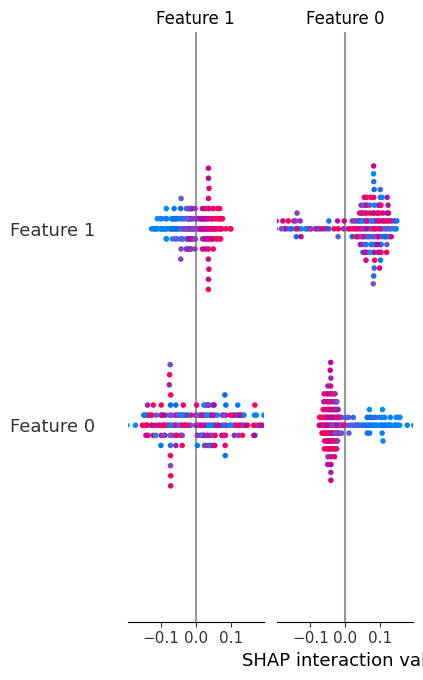

In [ ]:
import shap

# Create a SHAP explainer
explainer = shap.TreeExplainer(best_rf)

# Calculate SHAP values
shap_values = explainer.shap_values(X_test_selected)

# Plot summary
shap.summary_plot(shap_values, X_test_selected, plot_type="bar")

In [ ]:
!pip install shap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 9.1 MB/s eta 0:00:00


In [ ]:
import streamlit as st
import pandas as pd

def predict_disease(input_data):
    # Preprocess input data
    input_df = pd.DataFrame([input_data])
    input_scaled = scaler.transform(input_df)
    input_selected = selector.transform(input_scaled)

    # Make prediction
    prediction = best_rf.predict(input_selected)
    probability = best_rf.predict_proba(input_selected)

    return prediction[0], probability[0][1]

st.title('Disease Prediction System')

# Create input fields for each feature
input_data = {}
for feature in selected_features:
    input_data[feature] = st.number_input(f"Enter {feature}")

if st.button('Predict'):
    prediction, probability = predict_disease(input_data)
    st.write(f"Prediction: {'Disease' if prediction == 1 else 'No Disease'}")
    st.write(f"Probability of Disease: {probability:.2f}")

2024-08-19 17:26:23.286 Session state does not function when running a script without `streamlit run`


In [ ]:
path = "/usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py"


In [ ]:
!pip install streamlit